In [2]:
import pandas as pd

In [8]:
data = pd.read_csv('./脑电波数据/A1.csv',encoding='gbk')
mask = data['脑电连接信号是否正常'] != 0
# 使用布尔索引删除这些行
df = data[~mask]
df =df.reset_index(drop=True)
df

,日期,时间,脑电连接信号是否正常,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,17:47:16,0,78,51,539944,15807,1827,5839,6493,1121,417,189
1,06/02/2024,17:47:17,0,51,44,102340,134788,9470,13372,11316,2417,1533,1689
2,06/02/2024,17:47:18,0,53,61,1162988,28209,28336,8392,15695,5234,2635,1399
3,06/02/2024,17:47:19,0,50,67,926490,157242,60541,40168,38635,29760,16347,5620
4,06/02/2024,17:47:20,0,63,87,1322740,17367,28833,10425,7966,4284,677,481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,06/02/2024,17:50:31,0,63,44,26104,66225,5343,6422,17550,8295,3188,3660
194,06/02/2024,17:50:32,0,51,41,973919,210375,29190,5112,11287,5974,2877,1641
195,06/02/2024,17:50:33,0,41,43,264430,184054,33257,1238,2568,3382,1943,616
196,06/02/2024,17:50:34,0,48,53,125780,24779,19524,5117,3708,4024,4098,3992


In [12]:
# 最值归一化
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = df.iloc[:, 5:13]  # 选择第6到第13列
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(cols_to_scale)
scaled_features = scaler.transform(cols_to_scale)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["Delta","Theta","Alpha1","Alpha2","Beta1",
                                                       "Beta2","Gamma1","Gamma2"])
df_MinMax

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,0.183360,0.012035,0.006971,0.041587,0.081860,0.019364,0.014842,0.022687
1,0.031491,0.126854,0.044281,0.100595,0.151198,0.059198,0.083859,0.290640
2,0.399586,0.024003,0.136377,0.061585,0.214152,0.145781,0.152010,0.238835
3,0.317510,0.148523,0.293589,0.310497,0.543949,0.899616,1.000000,0.992855
4,0.455028,0.013540,0.138803,0.077511,0.103036,0.116582,0.030921,0.074848
...,...,...,...,...,...,...,...,...
193,0.005034,0.060689,0.024135,0.046154,0.240821,0.239865,0.186209,0.642730
194,0.333970,0.199797,0.140546,0.035892,0.150781,0.168526,0.166976,0.282065
195,0.087744,0.174397,0.160400,0.005546,0.025432,0.088858,0.109215,0.098964
196,0.039626,0.020693,0.093361,0.035931,0.041821,0.108591,0.242486,0.702036


In [13]:
other_df = df.drop(df.columns[5:13], axis=1)
merged_df=pd.concat([other_df, df_MinMax],axis=1)
merged_df

,日期,时间,脑电连接信号是否正常,专注度,放松,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,17:47:16,0,78,51,0.183360,0.012035,0.006971,0.041587,0.081860,0.019364,0.014842,0.022687
1,06/02/2024,17:47:17,0,51,44,0.031491,0.126854,0.044281,0.100595,0.151198,0.059198,0.083859,0.290640
2,06/02/2024,17:47:18,0,53,61,0.399586,0.024003,0.136377,0.061585,0.214152,0.145781,0.152010,0.238835
3,06/02/2024,17:47:19,0,50,67,0.317510,0.148523,0.293589,0.310497,0.543949,0.899616,1.000000,0.992855
4,06/02/2024,17:47:20,0,63,87,0.455028,0.013540,0.138803,0.077511,0.103036,0.116582,0.030921,0.074848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,06/02/2024,17:50:31,0,63,44,0.005034,0.060689,0.024135,0.046154,0.240821,0.239865,0.186209,0.642730
194,06/02/2024,17:50:32,0,51,41,0.333970,0.199797,0.140546,0.035892,0.150781,0.168526,0.166976,0.282065
195,06/02/2024,17:50:33,0,41,43,0.087744,0.174397,0.160400,0.005546,0.025432,0.088858,0.109215,0.098964
196,06/02/2024,17:50:34,0,48,53,0.039626,0.020693,0.093361,0.035931,0.041821,0.108591,0.242486,0.702036


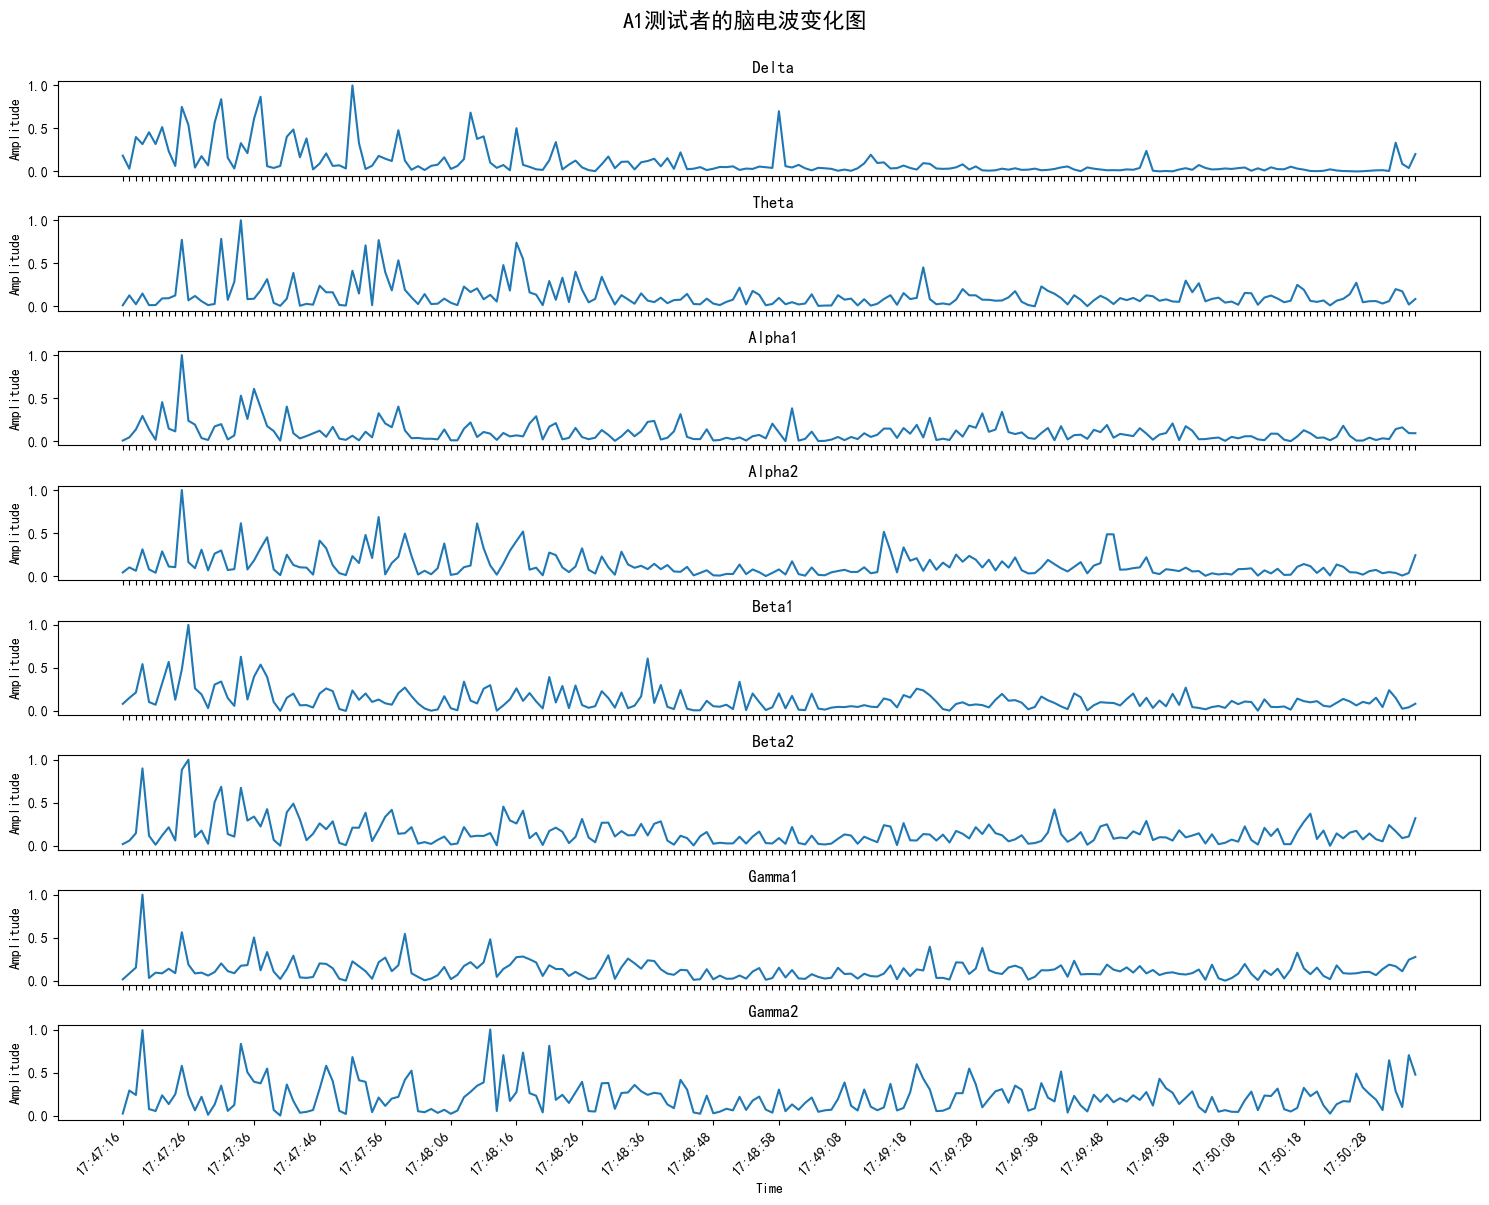

In [24]:
#未标准化的数据
import matplotlib.pyplot as plt

# 设置中文字体路径，例如使用'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 假设脑电波数据位于第2列到第9列（索引从0开始，即1到8）
# 选择脑电波数据列
eeg_data = merged_df.iloc[:, 5:13]

# 假设第一列是时间戳或者索引列
x_axis = merged_df.iloc[:, 1]
x_axis
# 创建一个图形和子图
fig, ax = plt.subplots(8, 1, figsize=(15, 12))

# 绘制每个通道的脑电波数据到对应的子图
EEg_list = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
for i, (ax, col) in enumerate(zip(ax.flatten(), eeg_data.columns)):
    ax.plot(x_axis, eeg_data[col], label=EEg_list[i])
    ax.set_title(f' {EEg_list[i]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# 格式化x轴时间显示
plt.gcf().autofmt_xdate()  # 自动旋转日期标记以便它们不会重叠

# 每隔n个时间点显示一个时间标签
# 例如，每隔50个数据点显示一个标签
interval = 10
x_ticks = x_axis[::interval]
plt.xticks(x_ticks, rotation=45)  # 旋转标签45度
fig.suptitle('A1测试者的脑电波变化图', fontsize=16, y=1.00)
# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [25]:
data = pd.read_csv('./脑电波数据/A3.csv',encoding='gbk')
mask = data['脑电连接信号是否正常'] != 0
# 使用布尔索引删除这些行
df = data[~mask]
df =df.reset_index(drop=True)
df

,日期,时间,脑电连接信号是否正常,专注度,放松度,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,06/02/2024,18:40:39,0,61,87,80793,100604,24261,13689,19992,7373,4993,2526
1,06/02/2024,18:40:40,0,56,78,4506,12509,16971,4907,15563,14149,13124,9095
2,06/02/2024,18:40:41,0,56,64,18415,32313,10493,8803,20344,15895,25649,2224
3,06/02/2024,18:40:42,0,56,63,70102,48516,16458,15464,14782,6991,7041,4314
4,06/02/2024,18:40:43,0,75,66,323513,64147,30723,6379,17509,21416,17370,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06/02/2024,18:43:54,0,67,51,8297,3320,10978,9897,5314,2694,2645,817
196,06/02/2024,18:43:55,0,60,70,24573,4121,11987,20844,2337,4236,3377,1350
197,06/02/2024,18:43:56,0,77,69,5591,28638,11111,36695,11055,10192,3812,1767
198,06/02/2024,18:43:57,0,66,75,3002,20266,9242,18978,3210,3478,2995,1663


In [26]:
# 最值归一化
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = df.iloc[:, 5:13]  # 选择第6到第13列
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(cols_to_scale)
scaled_features = scaler.transform(cols_to_scale)
df_MinMax = pd.DataFrame(data=scaled_features, columns=["Delta","Theta","Alpha1","Alpha2","Beta1",
                                                       "Beta2","Gamma1","Gamma2"])
# df_MinMax

In [27]:
other_df = df.drop(df.columns[5:13], axis=1)
merged_df=pd.concat([other_df, df_MinMax],axis=1)
# merged_df

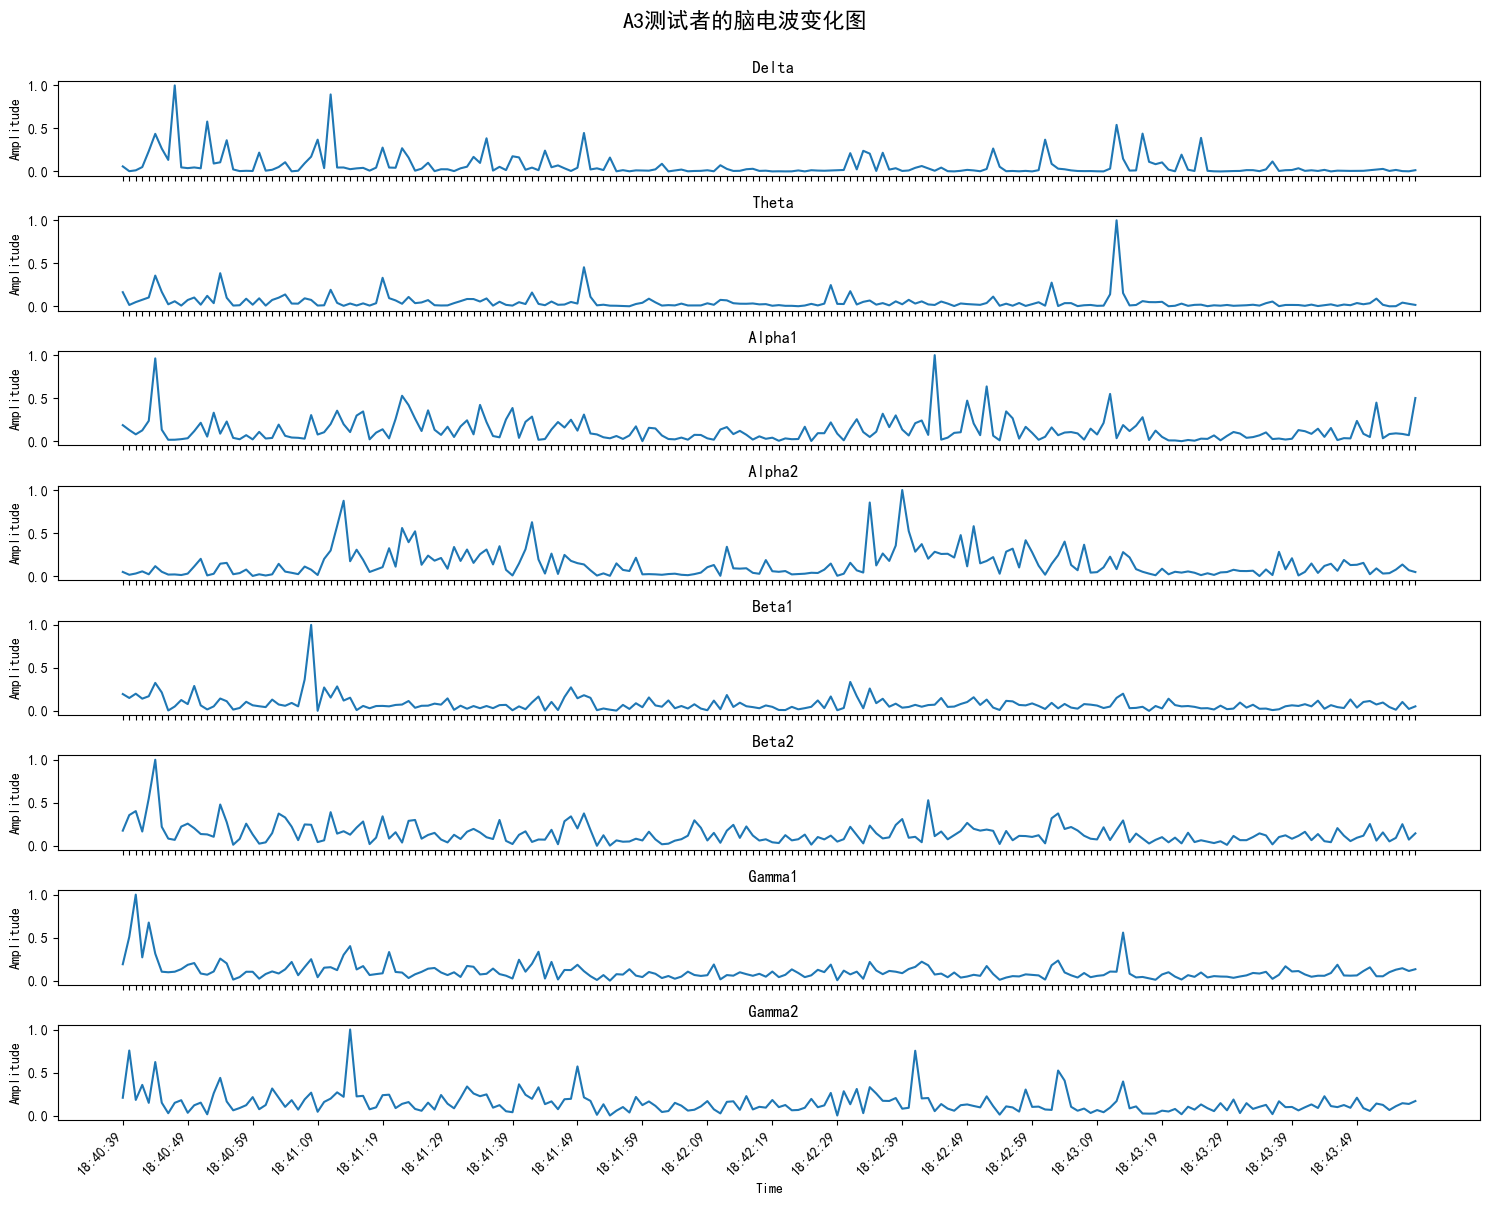

In [28]:
#未标准化的数据
import matplotlib.pyplot as plt

# 设置中文字体路径，例如使用'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 假设脑电波数据位于第2列到第9列（索引从0开始，即1到8）
# 选择脑电波数据列
eeg_data = merged_df.iloc[:, 5:13]

# 假设第一列是时间戳或者索引列
x_axis = merged_df.iloc[:, 1]
x_axis
# 创建一个图形和子图
fig, ax = plt.subplots(8, 1, figsize=(15, 12))

# 绘制每个通道的脑电波数据到对应的子图
EEg_list = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]
for i, (ax, col) in enumerate(zip(ax.flatten(), eeg_data.columns)):
    ax.plot(x_axis, eeg_data[col], label=EEg_list[i])
    ax.set_title(f' {EEg_list[i]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

# 格式化x轴时间显示
plt.gcf().autofmt_xdate()  # 自动旋转日期标记以便它们不会重叠

# 每隔n个时间点显示一个时间标签
# 例如，每隔50个数据点显示一个标签
interval = 10
x_ticks = x_axis[::interval]
plt.xticks(x_ticks, rotation=45)  # 旋转标签45度
fig.suptitle('A3测试者的脑电波变化图', fontsize=16, y=1.00)
# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()